In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 5)
import squarify

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-in-south-america-latest-data/covid_south_america.csv


Setting the precision of floating points and its format.

In [2]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

Let's take a look on the data.

In [3]:
df = pd.read_csv('/kaggle/input/covid-in-south-america-latest-data/covid_south_america.csv')
df.head()

,Country/Other,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,Argentina,8955458,126955,8753450.00,75053.00,195136,2766,34641140,754816,45893460
1,Bolivia,896315,21470,803321.00,71524.00,75063,1798,2682016,224609,11940836
2,Brazil,29194042,653588,27470786.00,1069668.00,135722,3039,63776166,296493,215101451
3,Chile,3230793,43283,2363592.00,823918.00,166602,2232,33721518,1738917,19392255
4,Colombia,6074155,139189,5904365.00,30601.00,117273,2687,33427450,645377,51795208


Understanding more the dataset.

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      13 non-null     object 
 1   Total Cases        13 non-null     int64  
 2   Total Deaths       13 non-null     int64  
 3   Total Recovered    11 non-null     float64
 4   Active Cases       11 non-null     float64
 5   Tot Cases/ 1M pop  13 non-null     int64  
 6   Deaths/ 1M pop     13 non-null     int64  
 7   Total Tests        13 non-null     int64  
 8   Tests/ 1M pop      13 non-null     int64  
 9   Population         13 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ KB


In [5]:
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,13.00,13.00,11.00,11.00,13.00,13.00,13.00,13.00,13.00
mean,4228150.62,97328.54,4307554.18,199131.27,127359.92,2348.08,16271739.85,750197.54,33595044.00
std,7973058.15,179856.22,8182946.26,374694.84,71251.59,1389.12,20237576.35,629474.48,57181974.03
min,63090.00,394.00,11254.00,248.00,18287.00,200.00,231515.00,118692.00,311694.00
25%,517516.00,5653.00,284917.00,10738.00,79565.00,1798.00,2470170.00,296493.00,3493985.00
50%,859165.00,21470.00,803321.00,30601.00,117273.00,2215.00,3359014.00,645377.00,18093623.00
75%,3530004.00,126955.00,4133978.50,73288.50,166602.00,2687.00,33427450.00,822074.00,33744364.00
max,29194042.00,653588.00,27470786.00,1069668.00,250201.00,6262.00,63776166.00,1929328.00,215101451.00


# Let's see which country has the biggest number of tests:

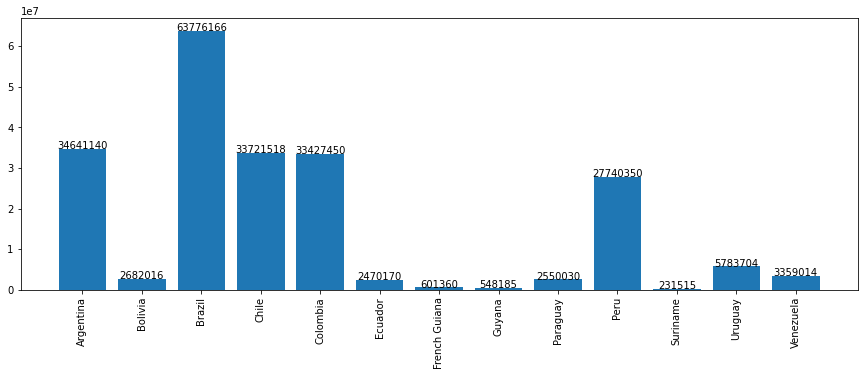

In [6]:
fig, ax = plt.subplots()

# Here we set the labels on x-axis to 90 degrees
plt.xticks(rotation=90)

# This function add data labes on top of each bar
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

ax.bar(df["Country/Other"], df["Total Tests"])

addlabels(df["Country/Other"], df["Total Tests"])

plt.show()

So we can define that Brazil has made more tests than any other south american country by March 10th.